In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from data import PathData

(50, 2)
(9, 2)


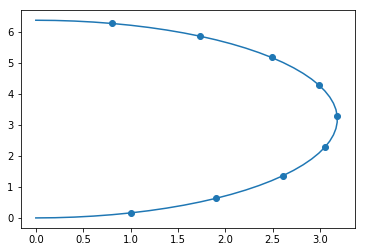

In [9]:
pdata = PathData()
path = pdata.make_arc_path_2(10, np.pi/10)
path_es = pdata.get_evenly_spaced_points(path,1.0)
print(path.shape)
print(path_es.shape)
plt.plot(path[:,0],path[:,1])
plt.scatter(path_es[:,0],path_es[:,1])
plt.show()

pdata.write_path_csv(path,"path.csv")